In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import sys
sys.path.append("../HelperFunctions")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import cv2
from tifffile import imread
from csbdeep.utils import download_and_extract_zip_file, plot_some
from csbdeep.data import RawData, create_patches
from selectrawdata import SelectRawData


Using TensorFlow backend.


In [2]:
raw_data = SelectRawData.Shuffle_from_folder(
    basepath    = '/run/user/1000/gvfs/smb-share:server=isiserver.curie.net,share=u934/equipe_bellaiche/l_sancere/Training_Data_Sets/Training_CARE_restoration/SpinwideFRAP4_Training_CARE_40x_bin1_3Kate/',
    source_dirs = ['Low'],
    target_dir  = 'GT',
    axes        = 'ZYX',   
    pattern = '*'
)

In [5]:
X, Y, XY_axes = create_patches (
    raw_data            = raw_data,
    patch_size          = (16,64,64),   #for bin1 it is 16 64 64 and for bin2 it is  16 32 32
    n_patches_per_image =  64,
    save_file           = '/run/media/sancere/DATA/Lucas_NextonCreated_npz/SpinwideFRAP4_Training_CARE_40x_bin1_3Kate.npz',
)

 2880 raw images x    1 transformations   =  2880 images
 2880 images     x   64 patches per image = 184320 patches in total
Input data:
/run/user/1000/gvfs/smb-share:server=isiserver.curie.net,share=u934/equipe_bellaiche/l_sancere/Training_Data_Sets/Training_CARE_restoration/SpinwideFRAP4_Training_CARE_40x_bin1_3Kate/: target='GT', sources=['Low'], axes='ZYX', pattern='*'
Transformations:
1 x Identity
Patch size:
16 x 64 x 64



100%|██████████| 2880/2880 [6:40:52<00:00,  8.35s/it]


Saving data to /run/media/sancere/DATA/Lucas_NextonCreated_npz/SpinwideFRAP4_Training_CARE_40x_bin1_3Kate.npz.


In [6]:
assert X.shape == Y.shape
print("shape of X,Y =", X.shape)
print("axes  of X,Y =", XY_axes)

shape of X,Y = (184320, 1, 16, 64, 64)
axes  of X,Y = SCZYX


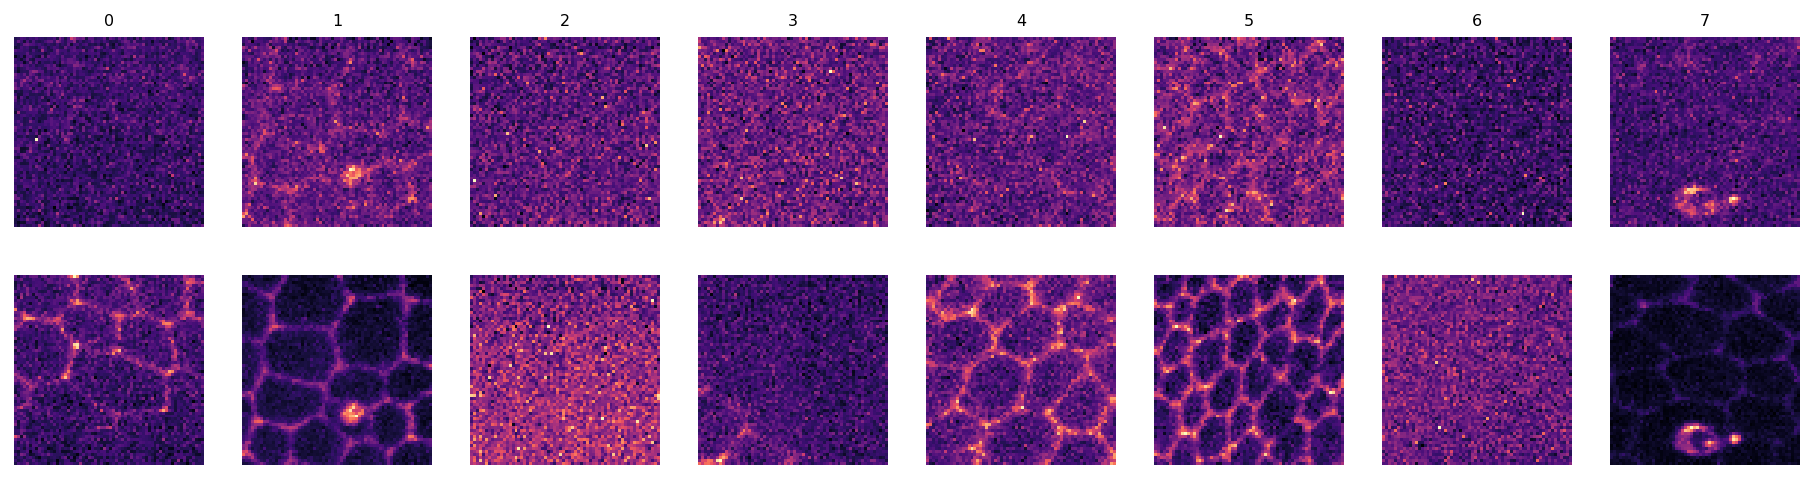

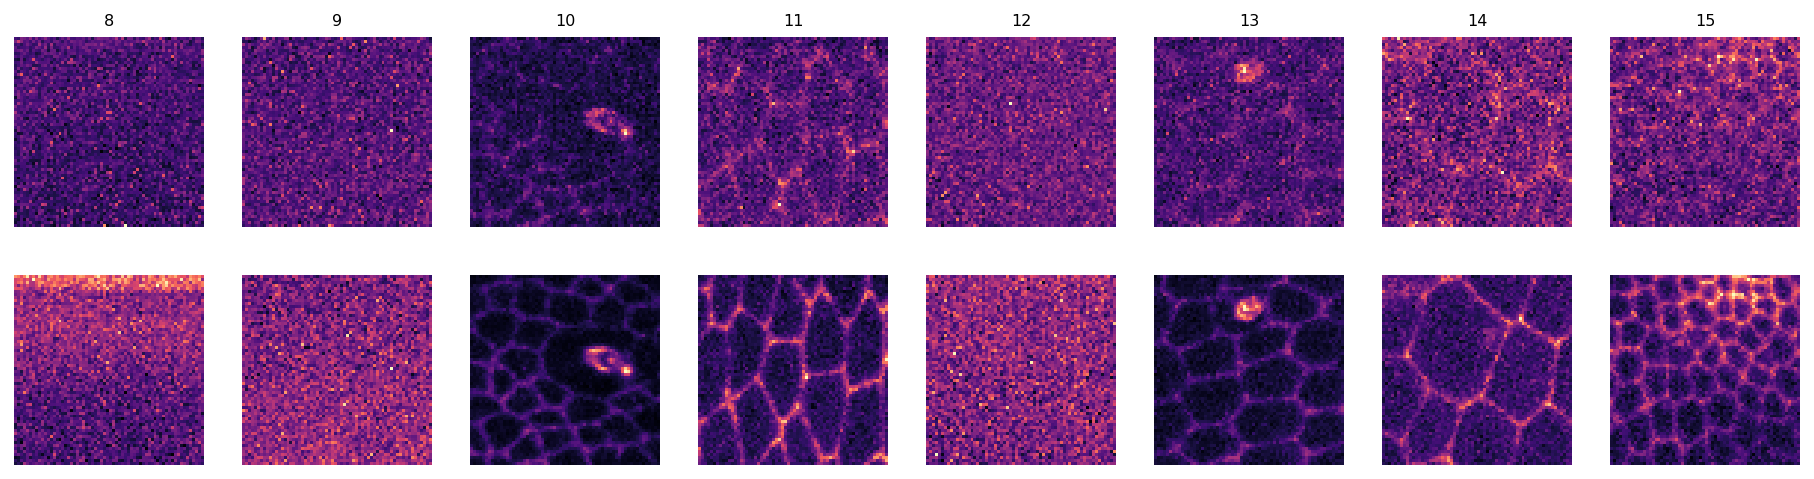

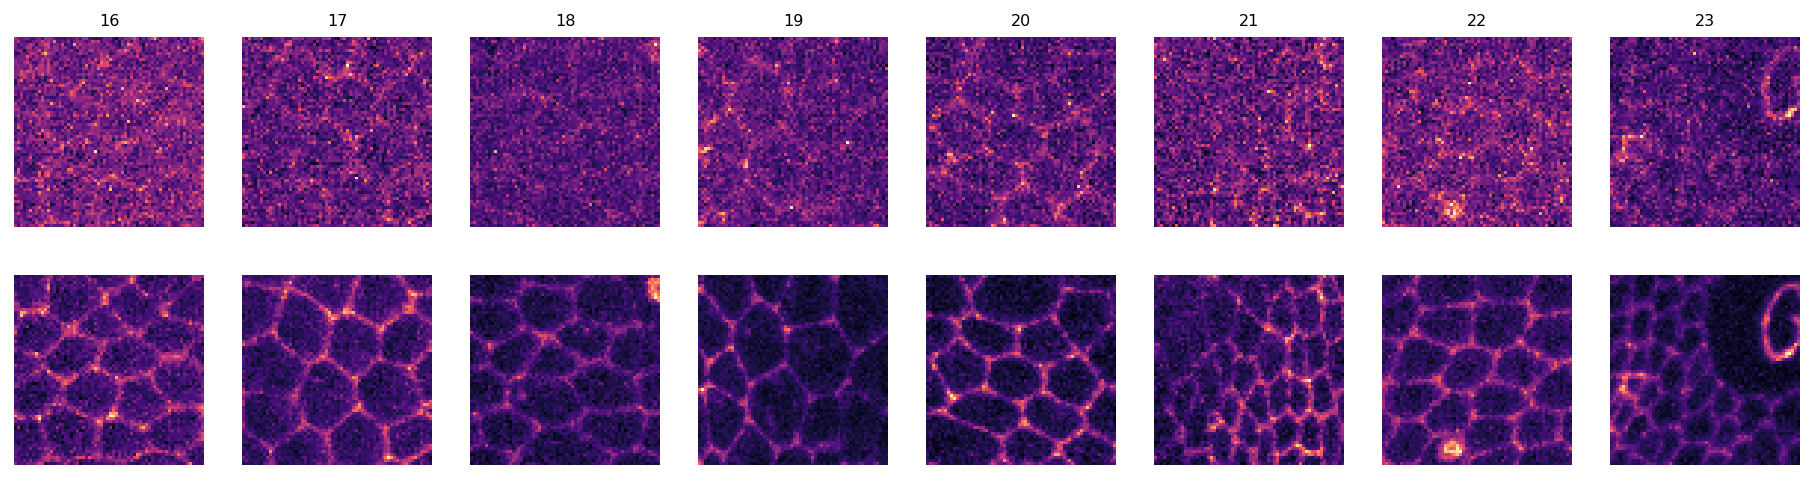

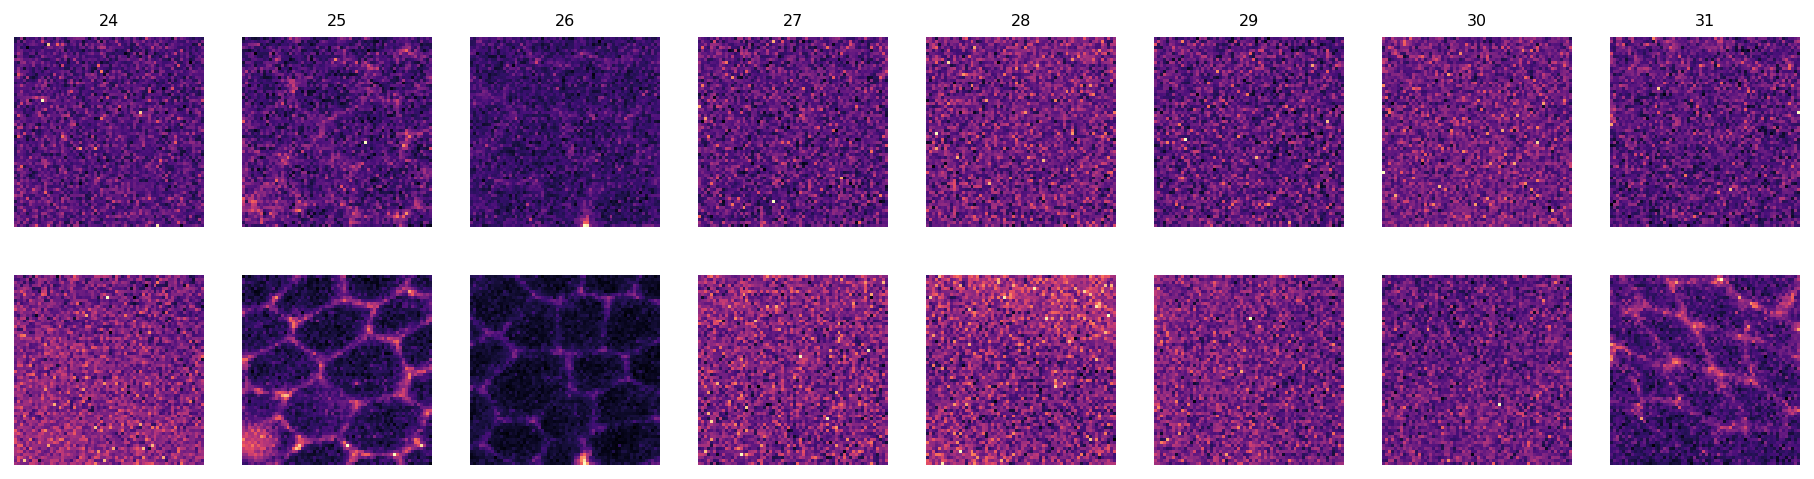

In [7]:
for i in range(4):
    plt.figure(figsize=(16,4))
    sl = slice(8*i, 8*(i+1)), 0
    plot_some(X[sl],Y[sl],title_list=[np.arange(sl[0].start,sl[0].stop)])
    plt.show()
None;

In [8]:
from csbdeep.utils import Path

TriggerName = '/home/sancere/NextonDisk_1/TimeTrigger/TT1'
Path(TriggerName).mkdir(exist_ok = True)